In [1]:
import pickle

import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
import dill as pickle
import random
import sys
np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#print(os.getcwd())
from codes.experimentclasses.RigidEthanolPCA import RigidEthanolPCA
from codes.otherfunctions.multirun import get_coeffs_reps_tangent
from codes.otherfunctions.multirun import get_grads_reps_pca2_tangent
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch_tangent
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.get_grads_tangent import get_grads_tangent
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
import matplotlib.pyplot as plt
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.geometer.RiemannianManifold import RiemannianManifold
from collections import Counter

/Users/samsonkoelle/manifoldflasso_jmlr


In [2]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/manifoldflasso_jmlr/untracked_data/embeddings/rigidethanol_032520replicates_fix.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)
# supports = {}
# for i in range(nreps):
#     print(i)
#     supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))
#plot_support_2d(supports, experiment.p)
#fig.savefig(folder + '/flasso_support')

In [6]:
nreps= 25
dim = 2
from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

supports = {}
for i in range(nreps):
    print(i)
    supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))
#plot_support_2d(supports, experiment.p)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [11]:
import seaborn as sns
def plot_support_2d(supports, p):
    to_plot = np.zeros((p, p))
    support_indices = np.asarray(list(supports.values()))
    
    for i in range(len(support_indices)):
        if type(support_indices[i]) == np.ndarray:
            to_plot[support_indices[i][0], support_indices[i][1]] += 1
            to_plot[support_indices[i][1], support_indices[i][0]] += 1
    fig, ax = plt.subplots()
    sns.heatmap(to_plot, ax=ax)
    ax.set_xlabel('Dictionary function 1')
    ax.set_ylabel('Dictionary function 2')
    ax.set_title('Frequency of support selection', fontsize  = 16)
    #plt.colorbar(ax)
    #clb.ax.set_title(ax, 'Selection frequency')
    #plt.colorbar('hi')

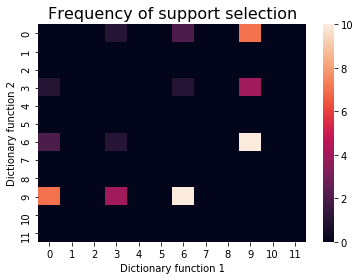

In [14]:
%matplotlib inline
p = 12
plot_support_2d(supports, p)